# Bitcoin_Data_Analysis
Data Collection and Summary stats

In [2]:
import zstandard as zstd
import shutil
import os

def decompress_zst(input_file, output_file, max_samples):
    with open(input_file, 'rb') as compressed_file:
        decomp = zstd.ZstdDecompressor()
        with open(output_file, 'wb') as output:
            total_samples = 0
            for chunk in decomp.read_to_iter(compressed_file):
                output.write(chunk)
                total_samples += chunk.count(b'\n')
                if total_samples >= max_samples:
                    break

# List of input files
input_files = ['/Users/shivanipaunikar/Downloads/Project- crypto/Bitcoin/Bc.zst', '/Users/shivanipaunikar/Downloads/Project- crypto/Bitcoin/Bs.zst']

# Output directory where decompressed files will be stored
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Maximum number of samples you want to use
max_samples = 5000

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through each input file and decompress
for input_file in input_files:
    # Generate the output file path by removing the .zst extension and adding .json
    output_file = os.path.join(output_directory, os.path.splitext(os.path.basename(input_file))[0] + '.json')
    
    print(f"Processing: {input_file}")
    
    # Decompress the input file, limiting to max_samples, and save it to the output file path
    decompress_zst(input_file, output_file, max_samples)
    
    print(f"Completed: {input_file} -> {output_file}")

print("All files processed.")


Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Bitcoin/Bc.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Bitcoin/Bc.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/Bc.json
Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Bitcoin/Bs.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Bitcoin/Bs.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/Bs.json
All files processed.


In [3]:
import pandas as pd
import json
import os

# Define the output directory where the JSON files were decompressed
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Function to fix JSON syntax errors
def fix_json_syntax(input_file, output_file):
    with open(input_file, 'r') as input_json, open(output_file, 'w') as output_json:
        for line in input_json:
            try:
                json_obj = json.loads(line)
                corrected_line = json.dumps(json_obj) + '\n'
                output_json.write(corrected_line)
            except json.JSONDecodeError as e:
                # Handle JSON syntax errors here or simply skip problematic lines
                print(f"Skipping line due to JSON syntax error: {line.strip()}")
                continue

# Specify your input and output file paths for fixing 'Bs.json' syntax
input_file_path_bs = os.path.join(output_directory, 'Bs.json')
output_file_path_bs = os.path.join(output_directory, 'Bs_fixed.json')

# Call the function to fix JSON syntax errors in 'Bs.json'
fix_json_syntax(input_file_path_bs, output_file_path_bs)

# Specify your input and output file paths for fixing 'Bc.json' syntax
input_file_path_bc = os.path.join(output_directory, 'Bc.json')
output_file_path_bc = os.path.join(output_directory, 'Bc_fixed.json')

# Call the function to fix JSON syntax errors in 'Bc.json'
fix_json_syntax(input_file_path_bc, output_file_path_bc)

# Define a function to read JSON data line by line
def read_json_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield json.loads(line)

# Use os.path.join to construct file paths
submission_data = list(read_json_lines(output_file_path_bs))  # Use the fixed 'Bs.json' file as input
comment_data = list(read_json_lines(output_file_path_bc))  # Use the fixed 'Bc.json' file as input

# Create DataFrames
submission_df = pd.DataFrame(submission_data)
comment_df = pd.DataFrame(comment_data)

# Filter for Bitcoin-related data (you may need to adjust the filter)
bitcoin_submissions = submission_df[submission_df['title'].str.contains('Bitcoin', case=False, na=False)]
bitcoin_comments = comment_df[comment_df['body'].str.contains('Bitcoin', case=False, na=False)]

# Sample 5000 observations with replacement
bitcoin_submissions_sample = bitcoin_submissions.sample(n=5000, replace=True)
bitcoin_comments_sample = bitcoin_comments.sample(n=5000, replace=True)

# Export to CSV
bitcoin_submissions_sample.to_csv('bitcoin_submissions_sample.csv', index=False)
bitcoin_comments_sample.to_csv('bitcoin_comments_sample.csv', index=False)


Skipping line due to JSON syntax error: {"downs":8,"link_flair_text":null,"distinguished":null,"media":null,"url":"http://minefield.bitcoinlab.org/?r=hI04fqMpBifpfROM","link_flair_css_class":null,"id":"pa2nn","edited":false,"num_reports":null,"cre
Skipping line due to JSON syntax error: {"name":"t1_c1vnn0n","controversiality":0,"gilded":0,"archived":true,"author_flair_css_class":null,


In [4]:
# Load the CSV files
bitcoin_submissions_df = pd.read_csv('bitcoin_submissions_sample.csv')
bitcoin_comments_df = pd.read_csv('bitcoin_comments_sample.csv')


In [5]:
# Display the columns of the DataFrame
print("Columns in bitcoin_submissions_df:")
print(bitcoin_submissions_df.columns)

# Display a sample of the DataFrame
print("Sample data in bitcoin_submissions_df:")
print(bitcoin_submissions_df.head())

# Repeat the same for bitcoin_comments_df if needed
print("Columns in bitcoin_comments_df:")
print(bitcoin_comments_df.columns)

print("Sample data in bitcoin_comments_df:")
print(bitcoin_comments_df.head())


Columns in bitcoin_submissions_df:
Index(['archived', 'author', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_text',
       'author_flair_text_color', 'brand_safe', 'can_gild', 'contest_mode',
       'created_utc', 'distinguished', 'domain', 'edited', 'gilded', 'hidden',
       'hide_score', 'id', 'is_crosspostable', 'is_reddit_media_domain',
       'is_self', 'is_video', 'link_flair_css_class', 'link_flair_richtext',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media', 'media_embed', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'retrieved_on',
       'rte_mode', 'score', 'secure_media', 'secure_media_embed', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_name_prefixed', 'subreddit_type', 'suggested_sort',
       'thumbnail', 'thumbnail_height', 'thumbnail_width', 'title', 'url',
       'whitel

In [6]:
import pandas as pd

# Load the data into DataFrames (assuming you already have them loaded)
bitcoin_submissions_df = pd.read_csv('bitcoin_submissions_sample.csv')
bitcoin_comments_df = pd.read_csv('bitcoin_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
bitcoin_submissions_df['created_utc'] = pd.to_datetime(bitcoin_submissions_df['created_utc'], unit='s')
bitcoin_comments_df['created_utc'] = pd.to_datetime(bitcoin_comments_df['created_utc'], unit='s')

# Calculate the range of dates available
date_range_submissions = bitcoin_submissions_df['created_utc'].min(), bitcoin_submissions_df['created_utc'].max()
date_range_comments = bitcoin_comments_df['created_utc'].min(), bitcoin_comments_df['created_utc'].max()

print("Range of dates available in bitcoin_submissions_df:", date_range_submissions)
print("Range of dates available in bitcoin_comments_df:", date_range_comments)

# Calculate the number of posts, comments, and authors for each day
posts_per_day_submissions = bitcoin_submissions_df.groupby(bitcoin_submissions_df['created_utc'].dt.date).size()
comments_per_day = bitcoin_comments_df.groupby(bitcoin_comments_df['created_utc'].dt.date).size()
unique_authors_per_day_submissions = bitcoin_submissions_df.groupby(bitcoin_submissions_df['created_utc'].dt.date)['author'].nunique()

# Display the results
print("\nNumber of posts per day in bitcoin_submissions_df:")
print(posts_per_day_submissions)
print("\nNumber of comments per day in bitcoin_comments_df:")
print(comments_per_day)
print("\nNumber of unique authors per day in bitcoin_submissions_df:")
print(unique_authors_per_day_submissions)


Range of dates available in bitcoin_submissions_df: (Timestamp('2010-11-09 23:40:31'), Timestamp('2012-02-04 22:56:54'))
Range of dates available in bitcoin_comments_df: (Timestamp('2010-11-09 23:41:03'), Timestamp('2011-05-24 01:29:19'))

Number of posts per day in bitcoin_submissions_df:
created_utc
2010-11-09     1
2010-11-18     1
2010-12-01     1
2010-12-08     3
2010-12-11     6
              ..
2012-01-31     5
2012-02-01    31
2012-02-02     7
2012-02-03     5
2012-02-04    14
Length: 344, dtype: int64

Number of comments per day in bitcoin_comments_df:
created_utc
2010-11-09     15
2010-12-08      2
2010-12-10      5
2010-12-13      3
2010-12-16      3
             ... 
2011-05-20    199
2011-05-21    221
2011-05-22    301
2011-05-23    225
2011-05-24     27
Length: 104, dtype: int64

Number of unique authors per day in bitcoin_submissions_df:
created_utc
2010-11-09    1
2010-11-18    1
2010-12-01    1
2010-12-08    1
2010-12-11    4
             ..
2012-01-31    2
2012-02-01 

# Topic Modeling

In [7]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import models
import gensim.corpora as corpora
import gensim

In [8]:
# Load the data into DataFrames (assuming you already have them loaded)
bitcoin_submissions_df = pd.read_csv('bitcoin_submissions_sample.csv')
bitcoin_comments_df = pd.read_csv('bitcoin_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
bitcoin_submissions_df['created_utc'] = pd.to_datetime(bitcoin_submissions_df['created_utc'], unit='s')
bitcoin_comments_df['created_utc'] = pd.to_datetime(bitcoin_comments_df['created_utc'], unit='s')

# Combine comments and submissions text
bitcoin_text = bitcoin_submissions_df['selftext'].dropna().tolist() + bitcoin_comments_df['body'].dropna().tolist()


In [9]:
# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

bitcoin_text = [preprocess_text(text) for text in bitcoin_text]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)


In [11]:
# Apply TF-IDF vectorization
bitcoin_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in bitcoin_text])

In [12]:
pip install gensim matplotlib pyLDAvis


Note: you may need to restart the kernel to use updated packages.


In [13]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Assuming you have a list of preprocessed tokens called 'bitcoin_text'
# You can replace 'bitcoin_text' with your actual data
dictionary = Dictionary([tokens for tokens in bitcoin_text])
corpus = [dictionary.doc2bow(tokens) for tokens in bitcoin_text]

# Perform LDA topic modeling
lda_model_bitcoin = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=2)


In [14]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_bitcoin, texts=bitcoin_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.4f}')


Coherence Score: 0.3743


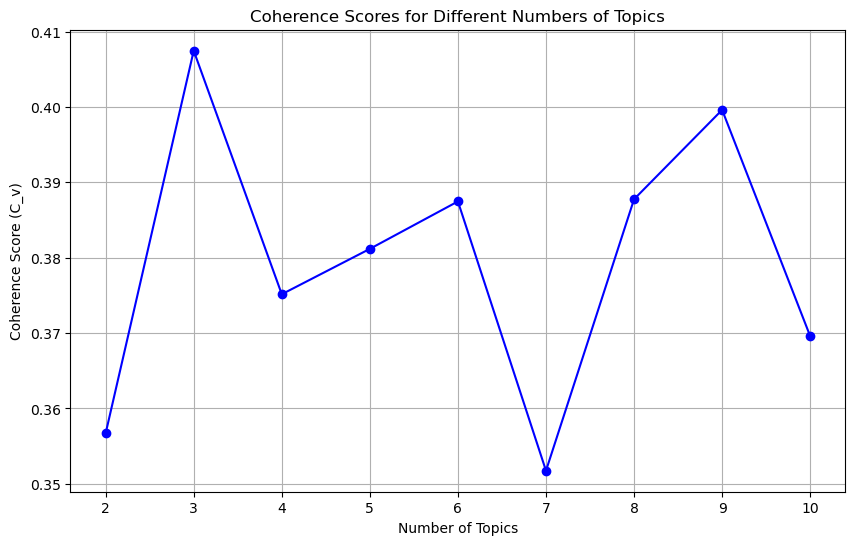

In [15]:
# Define a range of topic numbers to test
topics_range = range(2, 11)
coherence_scores = []

# Calculate coherence scores for different numbers of topics
for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=2)
    coherence_model = CoherenceModel(model=lda_model, texts=bitcoin_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.xticks(topics_range)
plt.grid(True)
plt.show()


In [16]:
# Print the topics generated by the LDA model
topics = lda_model_bitcoin.print_topics(num_words=3)  # You can adjust the number of words per topic
for topic in topics:
    print(topic)


(0, '0.028*"bitcoin" + 0.022*"would" + 0.014*"bitcoins"')
(1, '0.023*"http" + 0.016*"bitcoins" + 0.016*"mining"')
(2, '0.039*"bitcoin" + 0.012*"would" + 0.009*"people"')
(3, '0.027*"bitcoin" + 0.016*"bitcoins" + 0.011*"would"')
(4, '0.020*"bitcoin" + 0.016*"transaction" + 0.015*"block"')


# Sentiment Analysis

In [17]:
from textblob import TextBlob

# Combine Ethereum submissions and comments text into a single list
bitcoin_text = bitcoin_submissions_df['selftext'].dropna().tolist() + bitcoin_comments_df['body'].dropna().tolist()

# Preprocess the text data (if you haven't done this already)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)  # Join tokens into a single string

bitcoin_text = [preprocess_text(text) for text in bitcoin_text]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Example preprocessing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    
    # Other text cleaning steps (e.g., removing punctuation, stemming) can be added
    
    return " ".join(tokens)  # Convert tokens back to text

# Apply preprocessing to your text data
bitcoin_comments_df['cleaned_text'] = bitcoin_comments_df['body'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

In [20]:
# Apply sentiment analysis to your preprocessed text data
sentiments = [get_sentiment(text) for text in bitcoin_text]


In [21]:
# Create a DataFrame to store sentiments (optional)
sentiments_df = pd.DataFrame({'Sentiment': sentiments})

In [22]:
# Print or analyze the sentiment results as needed
print(sentiments_df['Sentiment'].value_counts())  # Display sentiment counts


neutral     3145
positive    3091
negative     649
Name: Sentiment, dtype: int64


In [26]:
# Assuming you have already performed sentiment analysis and stored results in 'sentiments' list
# Combine both comments and submissions text into a single list
bitcoin_text = bitcoin_submissions_df['selftext'].dropna().tolist() + bitcoin_comments_df['body'].dropna().tolist()


# Print the first few comments and submissions with their sentiments
for i, (text, sentiment) in enumerate(zip(bitcoin_text, sentiments)):
    if i >= 10:  # Print the first 10 (5 comments + 5 submissions)
        break
    if i < 5:
        print(f"Comment {i + 1}:")
    else:
        print(f"Submission {i - 4}:")
    print("Text:", text)
    print("Sentiment:", sentiment)
    print()


Comment 1:
Text: Also, say I'm taking payouts from mining pools at my locally hosted address.  What happens when a payout gets sent to me while my client is offline?  Is there any risk of losing those coins?
Sentiment: neutral

Comment 2:
Text: Holiday spirit and all that shit, plus I can't think of something fun online for people to do, so screw it, just give me either one Litecoin address or one Solidcoin address and I will present you with an Alternate Currency to check out, but.. you may only choose one! 

Litecoin client at http://litecoin.org/

Solidcoin client at http://solidcoin.info/

One per person, keep it clean or make fun of anything that isn't Bitcoin, I don't care.   I'll check back on this later tonight. 

Edit: Now open to Bitcointalk, replies there count toward a reply here https://bitcointalk.org/index.php?topic=55457.0
Sentiment: neutral

Comment 3:
Text: This is Bitcoin's first foray into the mainstream.  Millions of regular, technologically naive, financially unin

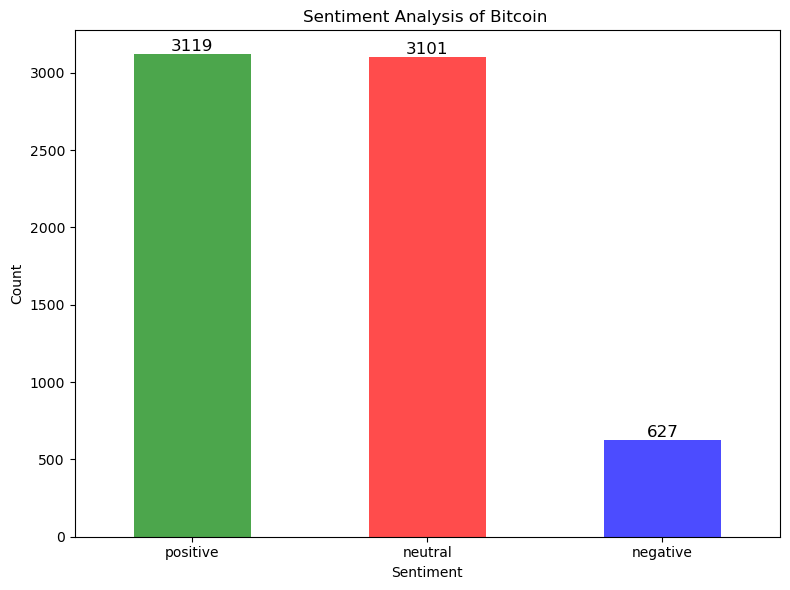

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already performed sentiment analysis and have a DataFrame 'sentiments_df'
# with a 'Sentiment' column containing sentiment labels (positive, negative, neutral)

# Count the occurrences of each sentiment label
sentiment_counts = sentiments_df['Sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Analysis of Bitcoin ')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with counts
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Emotion Analysis

In [24]:
pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "michellejieli/emotion_text_classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [ ]:
import torch

def get_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).item()
    emotion_labels = ["anger", "fear", "joy", "sadness", "surprise"]
    return emotion_labels[predicted_class]


In [ ]:
bitcoin_comments_df['emotion'] = bitcoin_comments_df['cleaned_text'].apply(get_emotion)

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion label
emotion_counts = bitcoin_comments_df['emotion'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple', 'orange'], alpha=0.7)
plt.title('Emotional Analysis of bitcoin Comments')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Annotate the bars with counts
for i, count in enumerate(emotion_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
